# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


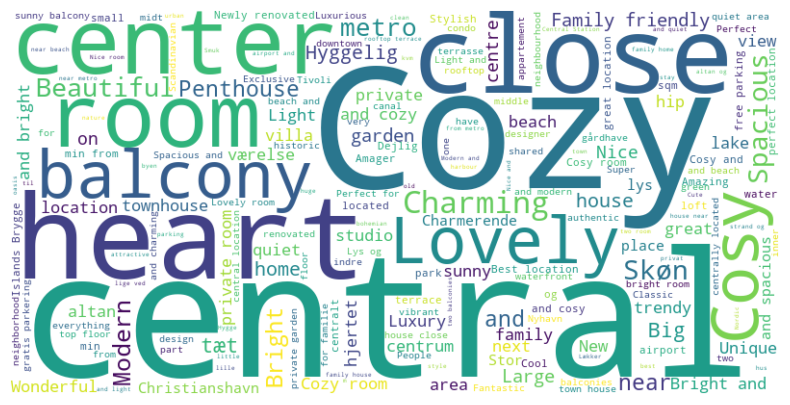

In [6]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

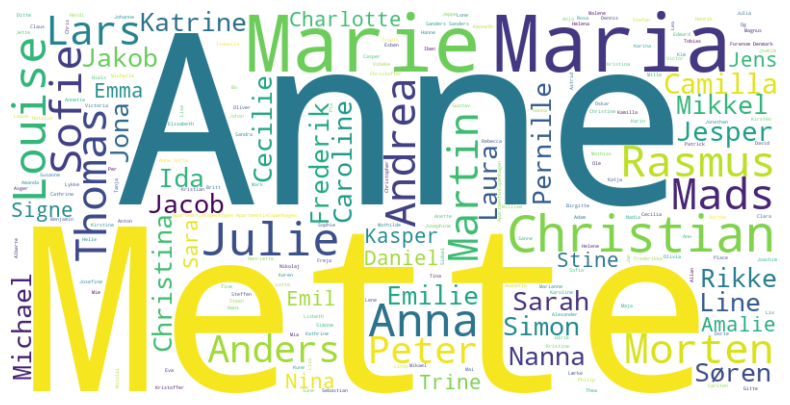

In [7]:
# State your solution here. Add more cells if needed.
text = ' '.join(data_filtered['host_name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

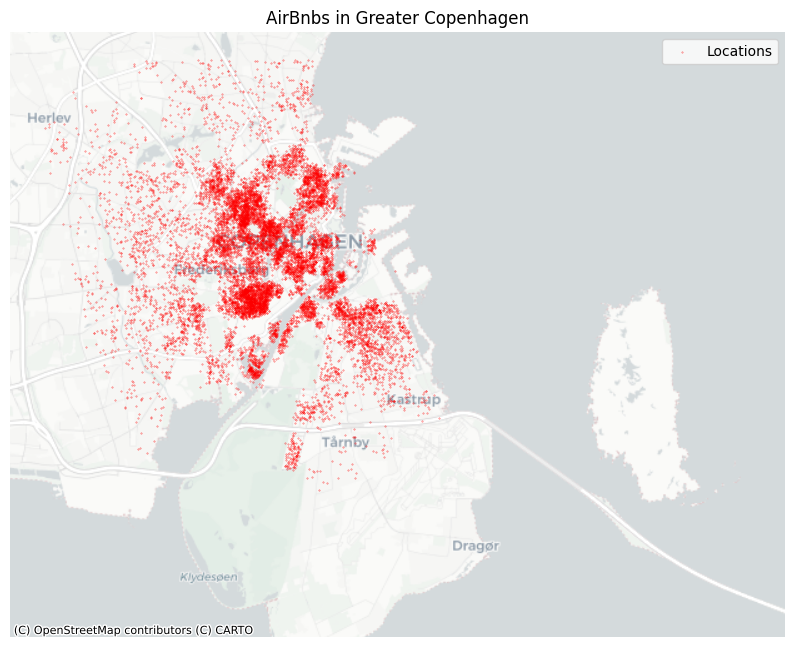

In [8]:
import geopandas as gpd
import contextily as ctx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# ---- 1. Load Address Coordinates from CSV ----
file_path = "listings.csv"  # Change to your actual CSV file path
df = pd.read_csv(file_path)
#df_half = df.sample(frac=0.8, random_state=42)

# Ensure the CSV has 'lat' and 'lon' columns
if "latitude" not in df.columns or "longitude" not in df.columns:
    raise ValueError("CSV file must have 'latitude' and 'longitude' columns.")

# Convert to GeoDataFrame
df["geometry"] = df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
gdf_points = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")  # Lat/Lon uses WGS84 (EPSG:4326)

# ---- 2. Load Greater Copenhagen Map ----
municipalities = [
    "Copenhagen Municipality, Denmark",
    "Frederiksberg Municipality, Denmark",
    "Tårnby Municipality, Denmark",
    #"Dragør Municipality, Denmark",
    #"Rødovre Municipality, Denmark",
    #"Hvidovre Municipality, Denmark",
    #"Brøndby Municipality, Denmark",
    #"Vallensbæk Municipality, Denmark",
    #"Ishøj Municipality, Denmark",
    #"Albertslund Municipality, Denmark",
    #"Herlev Municipality, Denmark",
    #"Gladsaxe Municipality, Denmark",
    #"Lyngby-Taarbæk Municipality, Denmark",
    #"Gentofte Municipality, Denmark"
]

# Download boundaries for all municipalities
gdfs = [ox.geocode_to_gdf(municipality) for municipality in municipalities]
gdf_map = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Convert both map and points to Web Mercator projection for basemap compatibility
gdf_map = gdf_map.to_crs(epsg=3857)
gdf_points = gdf_points.to_crs(epsg=3857)

# ---- 3. Plot the Map with Points ----
fig, ax = plt.subplots(figsize=(10, 10))

# Plot city boundaries
gdf_map.plot(ax=ax, alpha=0)

# Plot points (addresses)
gdf_points.plot(ax=ax, color="red", markersize=0.1, alpha=0.7, label="Locations")

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Formatting
ax.set_axis_off()
plt.legend()
plt.title("AirBnbs in Greater Copenhagen")
plt.show()


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

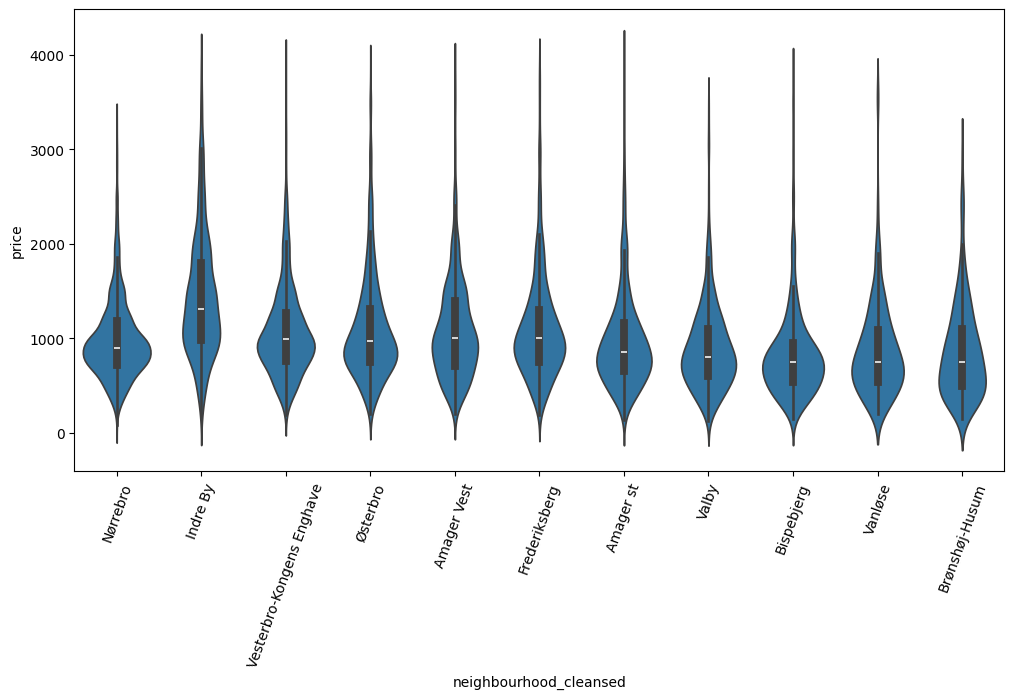

In [9]:
# State your solution here. Add more cells if needed.
import numpy as np
import seaborn as sns

normalized_price = pd.DataFrame(data_filtered)
normalized_price = data_filtered[data_filtered["price"] < 4000]

plt.figure(figsize=(12, 6))
sns.violinplot(x="neighbourhood_cleansed", y="price", data=normalized_price)
plt.xticks(rotation=70)
plt.show()


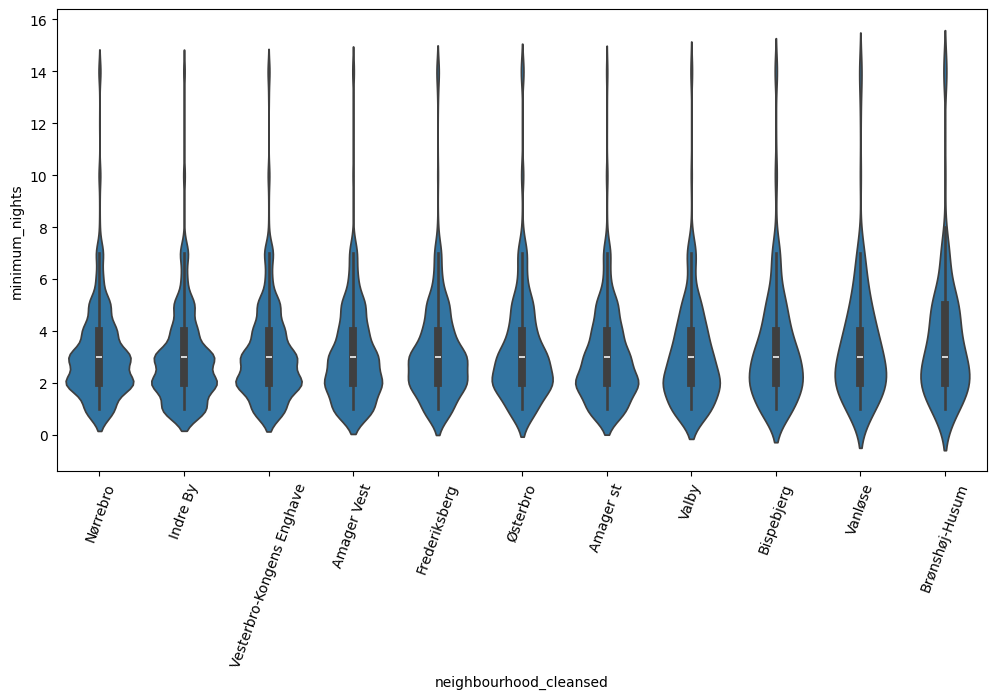

In [5]:
plt.figure(figsize=(12, 6))
normalized_nights = pd.DataFrame(data_filtered)
normalized_nights = data_filtered[data_filtered["minimum_nights"] < 15]
sns.violinplot(x="neighbourhood_cleansed", y="minimum_nights", data=normalized_nights)
plt.xticks(rotation=70)
plt.show()

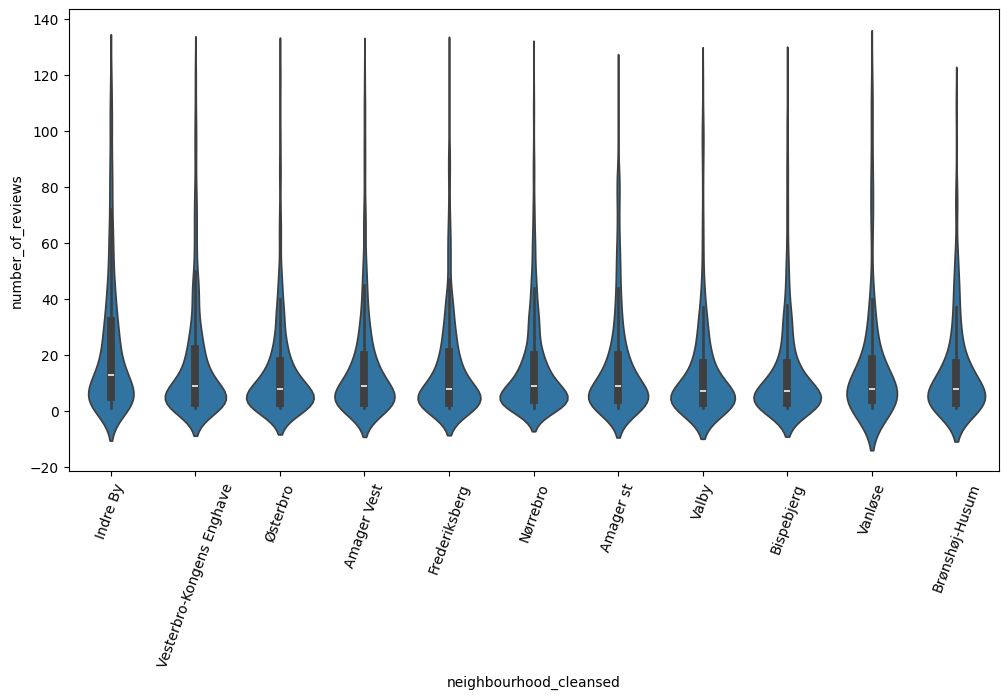

In [17]:
plt.figure(figsize=(12, 6))
normalized_number_of_reviews = pd.DataFrame(data_filtered)
normalized_number_of_reviews = data_filtered[data_filtered["number_of_reviews"] < 125]
sns.violinplot(x="neighbourhood_cleansed", y="number_of_reviews", data=normalized_number_of_reviews)
plt.xticks(rotation=70)
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

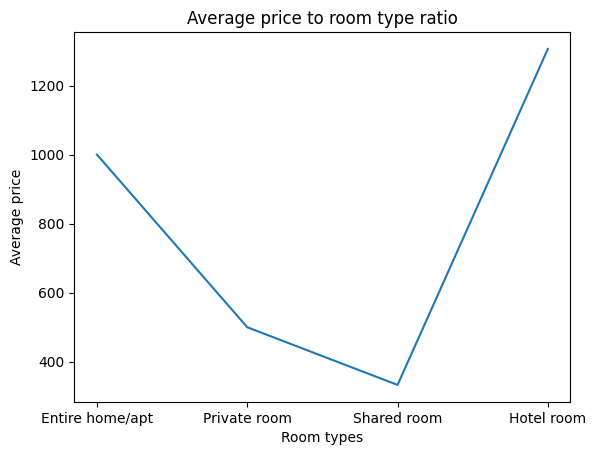

In [19]:
# State your solution here. Add more cells if needed.
#['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
entire_home_apt_prices = data_filtered[data_filtered['room_type'] == 'Entire home/apt']
entire_home_apt_prices = entire_home_apt_prices['price']

private_room_prices = data_filtered[data_filtered['room_type'] == 'Private room']
private_room_prices = private_room_prices['price'] 

shared_room_prices = data_filtered[data_filtered['room_type'] == 'Shared room']
shared_room_prices = shared_room_prices['price']

hotel_room_prices = data_filtered[data_filtered['room_type'] == 'Hotel room']
hotel_room_prices = hotel_room_prices['price']

xaxis = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
yaxis = [entire_home_apt_prices.median(), private_room_prices.median(), shared_room_prices.median(), hotel_room_prices.median()]
plt.plot(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Average price')
plt.title('Average price to room type ratio')
plt.show()

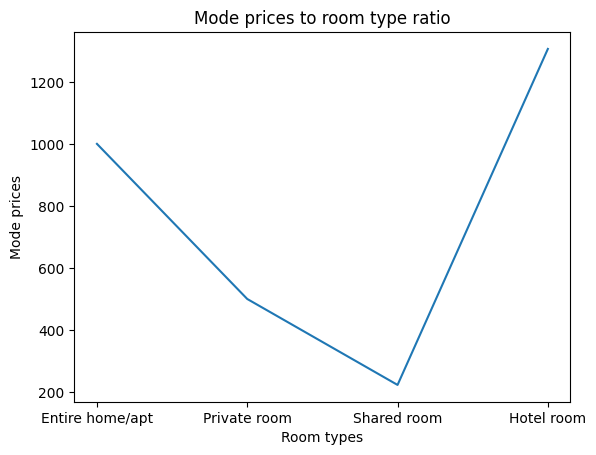

In [20]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.mode()[0], private_room_prices.mode()[0], shared_room_prices.mode()[0], hotel_room_prices.mode()[0]])

plt.plot(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Mode prices')
plt.title('Mode prices to room type ratio')
plt.show()

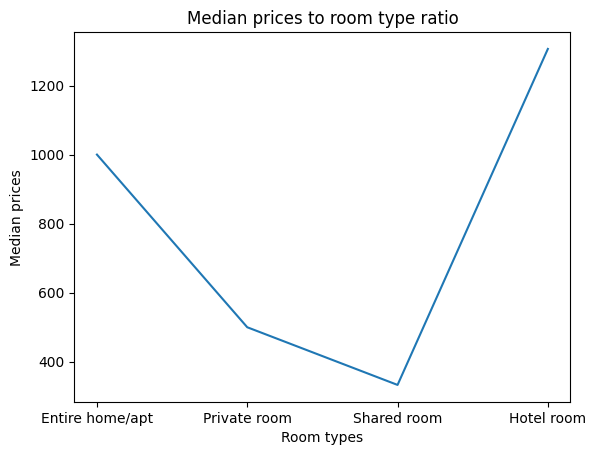

In [21]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.median(), private_room_prices.median(), shared_room_prices.median(), hotel_room_prices.median()])

plt.plot(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Median prices')
plt.title('Median prices to room type ratio')
plt.show()

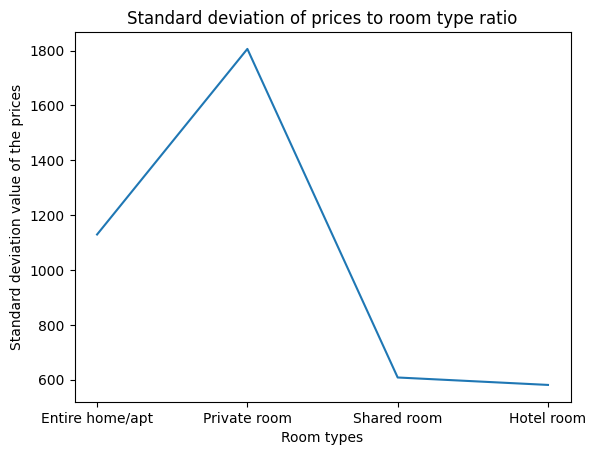

In [22]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.std(), private_room_prices.std(), shared_room_prices.std(), hotel_room_prices.std()])

plt.plot(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Standard deviation value of the prices')
plt.title('Standard deviation of prices to room type ratio')
plt.show()

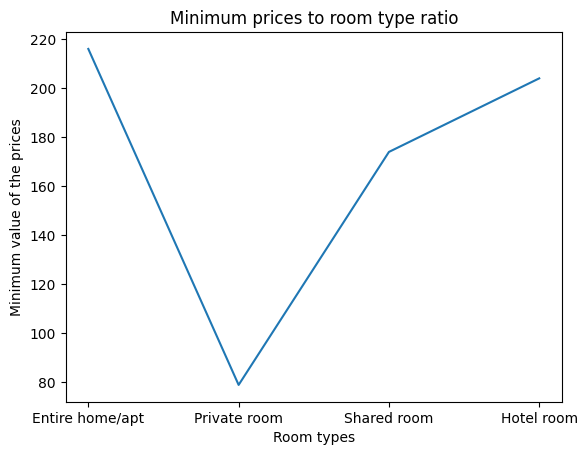

In [23]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.min(), private_room_prices.min(), shared_room_prices.min(), hotel_room_prices.min()])

plt.plot(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Minimum value of the prices')
plt.title('Minimum prices to room type ratio')
plt.show()

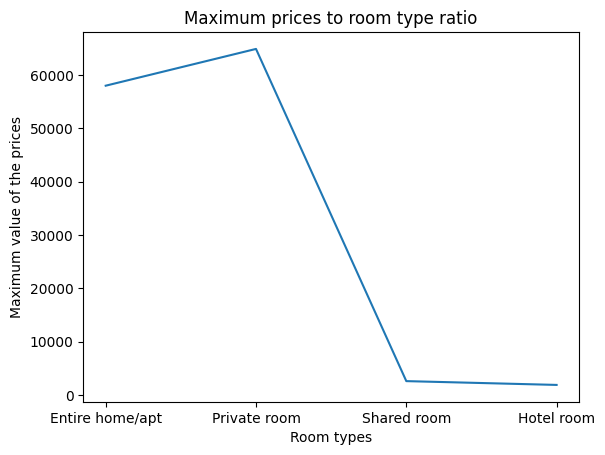

In [24]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.max(), private_room_prices.max(), shared_room_prices.max(), hotel_room_prices.max()])

plt.plot(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Maximum value of the prices')
plt.title('Maximum prices to room type ratio')
plt.show()

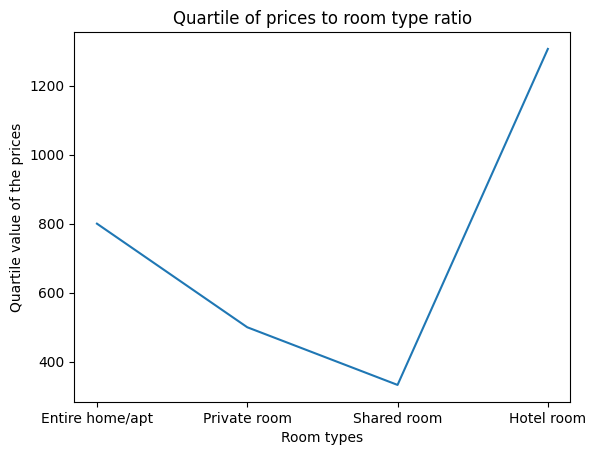

In [29]:
xaxis = np.array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
yaxis = np.array([entire_home_apt_prices.quantile(), private_room_prices.quantile(), shared_room_prices.quantile(), hotel_room_prices.quantile()])

plt.plot(xaxis, yaxis)
plt.xlabel('Room types')
plt.ylabel('Quartile value of the prices')
plt.title('Quartile of prices to room type ratio')
plt.show()

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Assuming data_filtered is defined

# Initialize LabelEncoders
label_encoder_neighbourhood = LabelEncoder()
label_encoder_room_type = LabelEncoder()

# Select features for KNN
knn_data = data_filtered[[
    "latitude",
    "longitude",
    "minimum_nights",
    "neighbourhood_cleansed",
    "room_type",
    "host_id",
    "id",
    "price",
    "number_of_reviews",  
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_location",
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",
]].copy()  # Create a copy to avoid SettingWithCopyWarning later

# Apply Label Encoding
knn_data.loc[:, 'neighbourhood_encoded'] = label_encoder_neighbourhood.fit_transform(knn_data['neighbourhood_cleansed'])
knn_data.loc[:, 'room_type_encoded'] = label_encoder_room_type.fit_transform(knn_data['room_type'])

# Drop original categorical columns
knn_data = knn_data.drop(['neighbourhood_cleansed', 'room_type', 'price', # initial not encoded columns dropped and price dropped
                          
                           'neighbourhood_encoded', # worse when added
                           # 'room_type_encoded', best performing metric!
                           # "latitude", # better, seems like lat,long makes more difference than neighbourhood
                           # "longitude", # better
                            "minimum_nights", # almost no difference
                            "host_id", # almost no difference
                            "id", # almost no difference
                            # "number_of_reviews", # no difference for all reviews
                            "review_scores_rating"  ,
                            "review_scores_accuracy" , 
                            "review_scores_cleanliness"  ,
                            "review_scores_location",
                            "review_scores_checkin"  ,
                            # "review_scores_communication"  ,
                            "review_scores_value"  ,
                            "reviews_per_month"  ,
                            # "calculated_host_listings_count" , # no difference
                            # "availability_365", marginally better with it
                         ], axis=1)
# Add price_category
knn_data = pd.concat([knn_data, data_filtered["price_category"]], axis=1)

# Prepare data for modeling
X = knn_data.iloc[:, :-1]  # All columns except the last one
Y = knn_data.iloc[:, -1]  # The last column (price_category)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=42, test_size=0.2
)

# Standard Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=110, p=2, metric="euclidean")
classifier.fit(X_train, Y_train)
prediction = classifier.predict(X_test)
print("Accuracy score: {}".format(classifier.score(X_test, Y_test)))


Accuracy score: 0.7061005770816158
